### 문제정의 
- 보스턴 주택 가격 데이터를 사용하여 주택 가격을 예측해 보자
- 회귀모델
- LinearRegression, SGDRefressor 

### 데이터 수집 

In [1]:
import warnings
warnings.filterwarnings('ignore') # warning을 무시하기

In [2]:
from sklearn import datasets
X,y = datasets.fetch_openml('boston', return_X_y=True)

In [3]:
X


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


#### 문제와 정답 합치기 


In [4]:
import pandas as pd 

X['CHAS'] = X['CHAS'].astype(int)
X['RAD']= X['RAD'].astype(int)


In [5]:
total = pd.concat([X, y], axis=1)

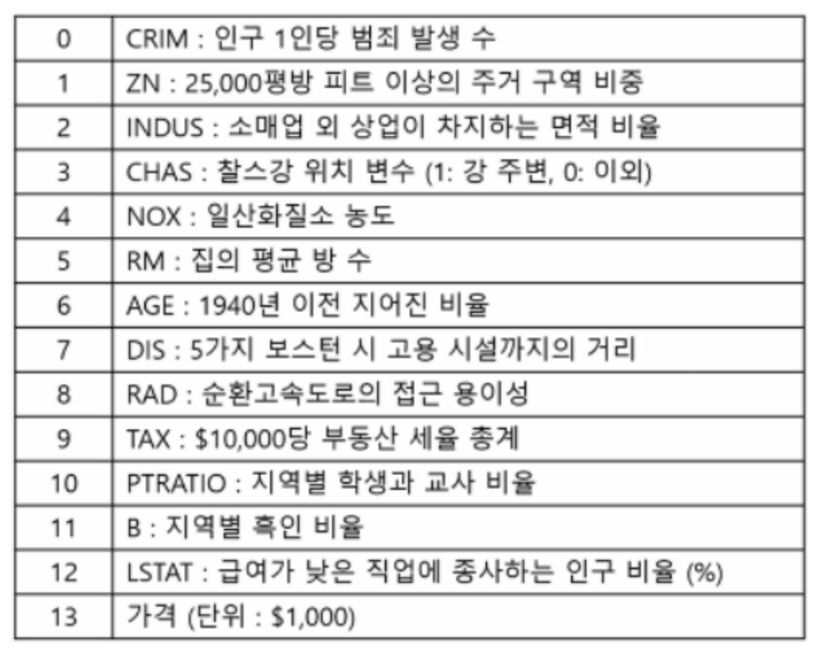

### 데이터 전처리 

#### 특성확장 
- 특성(문제)들끼리 곱해서 새로운 특성을 만들자 

In [19]:
col = X.columns

In [28]:
for i in range(col.size) : # 전체 컬럼을 순서대로 꺼내오는 for 
    for j in range(i, col.size) : # 어떤 컬럼을 곱할지 정하는 for 
        # i * j = i * j
        X[col[i]+ '*' + col[j]] =  X[col[i]] *  X[col[j]]
                           

In [29]:
X.shape

(506, 104)

In [31]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       ...
       'TAX*TAX', 'TAX*PTRATIO', 'TAX*B', 'TAX*LSTAT', 'PTRATIO*PTRATIO',
       'PTRATIO*B', 'PTRATIO*LSTAT', 'B*B', 'B*LSTAT', 'LSTAT*LSTAT'],
      dtype='object', length=104)

#### 데이터 스케일링 
- 주의사항 : 데이터 전처리 마지막에 사용 (결측치가 없어야 함, 이상치 있어도 됨) 

In [69]:
from sklearn.preprocessing import StandardScaler 

In [72]:
standard = StandardScaler()
standard.fit(X)

StandardScaler()

In [75]:
# Standardscaler 기준으로 변환 
X_trans = standard.transform(X)


### 탐색적 데이터 분석

#### 상관관계 분석 
- 피어슨 상관계수 : 두 컬럼의 선형도 판단 

In [6]:
total.select_dtypes(include=['int64', 'float64']).corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


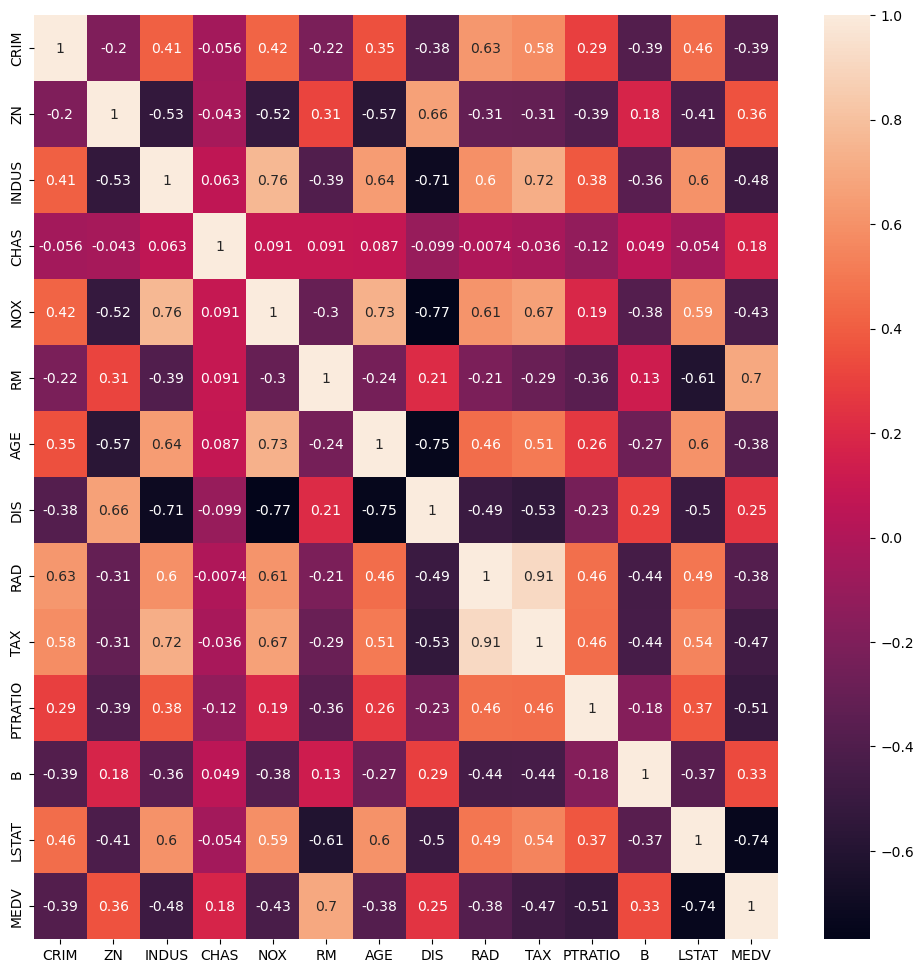

In [7]:
# 관계를 시각적을 확인하기 
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,12))
sns.heatmap(total.select_dtypes(include=['int64', 'float64']).corr(), annot=True)
# annot= Ture : 수치값 표현 
plt.show()

# heatmap(): 시각적으로 뚜렷한 차이를 확인 
# 활용 : 1. 데이터를 전처리 할 때 우선순위의 판단 근거 ==> 모델이 학습하는데 시간이 많이 걸릴때
#       2. 데이터를 줄일때 - 가지고 있는 컬럼들중에서 상관도가 낮은 것부터 삭제
#                        추가적으로 전처리를 하는데 시간이 부족할 경우 - 상관도가 높은것부터 차례로 전처리를 해줌 

# 0 ~ 0.3 : 관계가 미미함 
# 0.3 ~ 0.7 : 적당히 관계가 있다.
# 0.7 ~ 1 : 아주 관계가 높다 .


### 모델 선택 및 하이퍼파라미터 튜닝 

In [33]:
# 1. 수학적 공식을 적용한 해석적 모델 
from sklearn.linear_model import LinearRegression 
lr_model = LinearRegression()

# 2. 경사하강법 
from sklearn.linear_model import SGDRegressor
sgd_model = SGDRegressor()

#### 규제를 적용시킨 모델


In [40]:
from sklearn.linear_model import Lasso, Ridge

#### 훈련과 평가 데이터로 분리 

In [34]:
from sklearn.model_selection import train_test_split 
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)
# Scales
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

### 학습

In [35]:
lr_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)

SGDRegressor()

### 예측 

In [41]:
lr_model.score(X_train, y_train)
# score : 회귀에서는 정확도가 아닌 모델의 성능 ==> R2 score

# 74.95 ==> 93.27

0.9327287349548261

In [37]:
lr_model.score(X_test, y_test) 

0.8737472733292112

In [38]:
sgd_model.score(X_train, y_train)# 학습율 eta0 = 0.01 기본값으로 발산 

-1.1416756293936806e+36

In [39]:
sgd_model.score(X_test, y_test)

-7.946146304158253e+35

- 선형모델(회귀)에서의 평가지표 
    - 정량적인 지표가 중요 
    - MSE : 0 ~ 무한대, 오차의 판단기준이 모호 
    - R2 score : 분산을 기반으로 성능 예측, -1 ~ 1
        - -1 : 모델을 잘 설명하지 못한 경우
        -  1 : 모델을 잘 설명, 모델이 괜찮음
        - 최고점수는 1, 음수가 나올수도 있음 
        - 정확도가 아닌  ~%의 확률이라는 설명력을 가지고 있음.
        - 유의미한 경계 : 공학 0.7, 사회과학 0.3 


#### Ridge 활용하기


In [48]:
# Ridge의 하이퍼 파라미터 튜닝 
def ridge_alpha(alpha) :
    ridge = Ridge(alpha=alpha) # alpha 기본값 : 1.0, - 무한대 ~ 무한대,
                               # 일반적으로 사용하는 구간 : - 0.001 ~ 1000 
    ridge.fit(X_train, y_train) # 학습 
    print('train_ score : ', ridge.score(X_train, y_train)) # 결과를 함께 확인 
    print('test_ score : ', ridge.score(X_test, y_test))

In [50]:
ridge_alpha(0.01) # 1, 0.01, 0.001 
# alpha 값을 변경해가면서 값 확인 
# test_score가 가장 높은 순간 확인 

# alpha 기본값 = 1
# alpha 값이 증가 = 규제를 늘리겠다. --> 모델이 복잡해지는 걸 막겠다(과대적합일때 사용)
# alpha 값이 감소 = 규제를 줄이겠다 --> 모델이 단순해지는 걸 막겠다(과소적합일때 사용)


train_ score :  0.9320188069368053
test_ score :  0.8674925769391725


- Ridge 정리 
    - 규제를 줄이니 test_score가 상승 
    - 과대적합보다는 과소적합 or 일반화에 가까운 상황
    - 전체 데이터가 골고루 중요할 때 사용 

#### Lasso 활용하기 

In [54]:
import numpy as np

In [58]:
def lasso_alpha(alpha) :
    lasso = Lasso(alpha=alpha) # alpha 기본값 : 1.0, - 무한대 ~ 무한대,
                               # 일반적으로 사용하는 구간 : - 0.001 ~ 1000 
    lasso.fit(X_train, y_train) # 학습 
    print('train_ score : ', lasso.score(X_train, y_train)) # 결과를 함께 확인 
    print('test_ score : ', lasso.score(X_test, y_test))
    
    # 사용한 특성의 수 확인하기 
    print('사용한 특성 수 : ', np.sum(lasso.coef_!= 0 ))

In [66]:
# np.sum(lasso.coef_!= 0)
# np.sum(값) ==> 값을 전부다 더해주는 함수 
# lasso.coef_ = lasso가 학습한 후 전체데이터 특성들의 가중치값을 출력 
# lasso.coef_ == 0 ==> 사용되지 않은 값(가중치), False
# lasso.coef_ == 1 ==> 사용된 값(가중치), True

# lasso.coef_ != 0 
# np.sum([True, False, True, False, True])
# ==> True의 갯수를 세어서 사용된 특성의 수로 반환 

In [68]:
lasso_alpha(1)

# 규제를 늘릴수록 값(test_score)이 잘 안나옴
# 규제를 줄일수록 값이 잘나옴 
# 규제값을 변경하면서 사용된 특성의 수도 확인 

train_ score :  0.8839981825102611
test_ score :  0.8070964153467292
사용한 특성 수 :  55


- Lasso 정리
    - 규제를 적용할수록 test_score 값이 낮아짐, 특성의 수도 감소 
    - 특정 데이터가 중요할 때 사용 